# Opération de base de la classe Arbre234

In [99]:
from bisect import bisect_left
from graphviz import Digraph

class Noeud234:
    def __init__(self, cles=[], arbres=[], parent=None):
        self.cles = cles      # Liste des clés
        self.arbres = arbres  # Liste des sous-arbres
        self.parent = parent


class Arbre234:
    def __init__(self):
        self.racine = None


    def ajout(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie l'arbre après l'ajout de x'''
        if self.EstVide():
            A = Arbre234()
            A.racine = Noeud234([x], [Arbre234(), Arbre234()])
            return A
        
        return self.AjoutSimple(x)
    

    def recherche(self, x):
        '''Arbre234 * int -> Arbre234
        Renvoie le sous-arbre contenant x'''
        if self.EstVide():
            return None
        
        if self.EstDans(x):
            return self
        
        if x < self.Elem(0):
            return self.SsA_i(0).Recherche(x)
        elif self.Degre() == 2 or x < self.Elem(1):
            return self.SsA_i(1).Recherche(x)
        elif self.Degre() == 3 or x < self.Elem(2):
            return self.SsA_i(2).Recherche(x)
        else:
            return self.SsA_i(3).Recherche(x)
        

    def afficher_arbre(self, niveau=0):
        '''Arbre234 * int -> None
        Affiche l'arbre dans le terminal'''
        if self.racine is not None:
            print("  " * niveau, self.Contenu())
            for sous_arbre in self.SousArbres():
                if sous_arbre is not None:
                    sous_arbre.afficher_arbre(niveau + 1)


    def visualiser_arbre(self):
        '''Arbre234 -> None
        Visualise l'arbre avec Graphviz'''
        def creer_label_noeud(A):
            '''Arbre234 -> str'''
            noeud_label = ""
            sections = []

            # Commencer par un espace vide pour les sous-arbres
            sections.append(f' <f0> ')

            # Ajouter les clés et les espaces vides pour les sous-arbres entre chaque clé
            for i, cle in enumerate(A.Contenu()):
                sections.append(f' <f{i*2+1}> {str(cle)} ')
                sections.append(f' <f{i*2+2}> ')

            noeud_label = '|'.join(sections)
            return noeud_label

        def ajouter_noeuds_et_arcs(A, graph, parent_id=None, parent_port=''):
            '''Arbre234 * Digraph * str * str -> None'''
            if A.EstVide():
                return
            
            noeud_label = creer_label_noeud(A)
            noeud_id = f'node{abs(hash(A)) % (10 ** 8)}'  # Génère un ID unique plus court
            graph.node(noeud_id, label=noeud_label)

            if parent_id is not None and parent_port != '':
                graph.edge(f'{parent_id}:{parent_port}', noeud_id)

            sous_arbres = A.SousArbres()
            for i, arbre in enumerate(sous_arbres):
                if arbre.EstVide():
                    continue
                port = f'f{i*2}'  # Connecter aux ports des sous-arbres
                ajouter_noeuds_et_arcs(arbre, graph, noeud_id, port)

        g = Digraph('G', node_attr={'shape': 'record', 'height': '.1'})
        ajouter_noeuds_et_arcs(self, g)
        return g

## Primitive

In [100]:
def EstVide(self):
    '''Arbre234 -> bool'''
    return self.racine is None
    
    
def EstFeuille(self):
    '''Arbre234 -> bool'''
    return self.SsA_i(0).EstVide()


def Contenu(self):
    '''Arbre234 -> list[int]
    Retourne la liste des clés de l'arbre'''
    return self.racine.cles


def SousArbres(self):
    '''Arbre234 -> list[Arbre234]
    Retourne la liste des sous-arbres de l'arbre'''
    return self.racine.arbres
    

def Pere(self):
    '''Arbre234 -> Arbre234'''
    return self.racine.parent


def Degre(self):
    '''Arbre234 -> int'''
    return len(self.SousArbres())


def SsA_i(self, i):
    '''Arbre234 * int -> Arbre234
    Retourne le i-ème sous-arbre de l'arbre'''
    if (i >= 0 and i <= 3):
        return self.SousArbres()[i]


def EstDans(self, x):
    '''Arbre234 * int -> bool'''
    return x in self.Contenu()


def Elem(self, i):
    '''Arbre234 * int -> int
    Retourne la i-ème clé de l'arbre'''
    if (i >= 0 and i <= 2):
        return self.Contenu()[i]


def Index(self):
    '''Arbre234 -> int
    Retourne l'indice de l'arbre dans son père'''
    if self.Pere() is None:
        return -1
    return self.Pere().SousArbres().index(self)


def Min(self):
    '''Arbre234 -> int
    Retourne la plus petite clé de l'arbre'''
    return self.Elem(0)


def Max(self):
    '''Arbre234 -> int
    Retourne la plus grande clé de l'arbre'''
    return self.Elem(self.Degre() - 2)


def VoisonGauche(self):
    '''Arbre234 -> Arbre234
    Retourne le voisin gauche de l'arbre'''
    position = self.Index()
    if position == 0 or position == -1:
        return None
    return self.Pere().SsA_i(position - 1), position - 1


def VoisonDroit(self):
    '''Arbre234 -> Arbre234
    Retourne le voisin droit de l'arbre'''
    position = self.Index()
    lePlusADroite = self.Pere().Degre() - 1
    if position == lePlusADroite or position == -1:
        return None
    return self.Pere().SsA_i(position + 1), position + 1
    

def Dupplique(self, parent=None):
    '''Arbre234 -> Arbre234
    Retourne une copie de l'arbre'''
    A = Arbre234()

    if self.EstVide():
        return A
    
    sous_arbres = []
    contenus = self.Contenu().copy()
    for i in range(self.Degre()):
        sous_arbres.append(self.SsA_i(i).Dupplique(A))
    A.racine = Noeud234(contenus, sous_arbres, parent)
    return A


# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234.EstVide = EstVide
Arbre234.EstFeuille = EstFeuille
Arbre234.Contenu = Contenu
Arbre234.SousArbres = SousArbres
Arbre234.Pere = Pere
Arbre234.Degre = Degre
Arbre234.SsA_i = SsA_i
Arbre234.EstDans = EstDans
Arbre234.Elem = Elem
Arbre234.Index = Index
Arbre234.Min = Min
Arbre234.Max = Max
Arbre234.VoisonGauche = VoisonGauche
Arbre234.VoisonDroit = VoisonDroit
Arbre234.Dupplique = Dupplique

## Fonction auxiliaire ajout

In [101]:
def AjoutSimple(self, x, parent=None):
    '''Arbre234 * int -> Arbre234
    Renvoie l'arbre après l'ajout de x à la racine'''
    if self.EstDans(x):
        return 
    
    if self.Degre() == 4:
        self.racine = self.EcR(x, parent)

    if self.EstFeuille():
        A = self.Dupplique(parent)
        indice = bisect_left(A.Contenu(), x)
        A.Contenu().insert(indice, x)
        A.SousArbres().insert(indice, Arbre234())
        return A
    
    A = Arbre234()
    A.racine = Noeud234(self.Contenu().copy(), [], parent)
    indice = bisect_left(A.Contenu(), x) # correspond à l'indice du sous arbre où faut insérer x

    for (i, a) in enumerate(self.SousArbres()):
        if i == indice:
            A.SousArbres().append(a.AjoutSimple(x, A))
            if A.Degre() > 1 and (A.SsA_i(A.Degre() - 1).Elem(0) < A.SsA_i(A.Degre() - 2).Elem(0)): # On compare les clés des 2 derniers sous arbres
                A.SousArbres()[A.Degre() - 1], A.SousArbres()[ A.Degre() - 2] = A.SousArbres()[ A.Degre() - 2], A.SousArbres()[ A.Degre() - 1] # swap 
        else:
            A.SousArbres().append(a.Dupplique(A))
    return A


def EcR(self, x, P=None):
    '''Arbre234 -> Noeud234
    Effectue un éclatement'''
    G = Arbre234()
    G.racine = Noeud234([self.Elem(0)], [self.SsA_i(0), self.SsA_i(1)])
    D = Arbre234()
    D.racine = Noeud234([self.Elem(2)], [self.SsA_i(2), self.SsA_i(3)])

    if not(self.EstFeuille()): # Les enfants des feuilles sont des arbres vides et donc n'ont pas de parent
        self.SsA_i(0).racine.parent = G
        self.SsA_i(1).racine.parent = G
        self.SsA_i(2).racine.parent = D
        self.SsA_i(3).racine.parent = D

    if P is None: # Eclatement à la racine
        A = Arbre234()
        A.racine = Noeud234([self.Elem(1)], [G, D])
        G.racine.parent = A
        D.racine.parent = A
        return A.racine

    indice = bisect_left(P.Contenu(), self.Elem(1)) # Eclatement d'un noeud autre que la racine
    P.Contenu().insert(indice, self.Elem(1))
    indiceX = bisect_left(P.Contenu(), x)
    G.racine.parent = P
    D.racine.parent = P
    if indice == indiceX: # Après l'ajout de l'élément du milieu du noeud eclaté, si l'indice ne change pas cela veut dire que x est inférieur à l'élément du milieu et donc on renvoie le sous arbre gauche
        P.SousArbres().insert(indice, D) # On insère d'abord le sous arbre droit puis le sous arbre gauche, la propriété de l'arbre234 ne sera plus respectée, problème résolu avec le swap dans AjoutSimple
        return G.racine
    
    P.SousArbres().insert(indice, G) # Sinon on renvoie le sous arbre droit
    return D.racine


# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234.EcR = EcR
Arbre234.AjoutSimple = AjoutSimple

## Fonction auxiliaire supprime

In [102]:
def SuppressionSimple(self, x):
    pass


def MiseAJour(self, V, i, monte):
    descend = self.Pere().Contenu()[i]
    V.Contenu().remove(monte)
    self.Pere().Contenu()[i] = monte
    self.Contenu().append(descend)


def Fusion(self, G, D, i):
    g = G.Elem(0)
    A1 = G.SsA_i(0)
    A2 = G.SsA_i(1)
    if self.Degre() == 2 and self.Pere() is None:
        d = D.Elem(0)
        A3 = D.SsA_i(0)
        A4 = D.SsA_i(1)
        self.SousArbres().remove(G)
        self.SousArbres().remove(D)
        self.Contenu().insert(0, g)
        self.Contenu().append(d)
        self.SousArbres().append(A1)
        self.SousArbres().append(A2)
        self.SousArbres().append(A3)
        self.SousArbres().append(A4)
        return
    
    p = self.Elem(i)
    self.SousArbres().remove(G)
    self.Contenu().remove(p)
    D.Contenu().insert(0, p)
    D.Contenu().insert(0, g)
    self.SousArbres().insert(0, A2)
    self.SousArbres().insert(0, A1)

# Ajout des fonctions aux méthodes de la classe Arbre234
Arbre234.MiseAJour = MiseAJour
Arbre234.Fusion = Fusion

## Tests

 [3, 8, 10]
   [1, 2]
   [4]
   [9]
   [11, 15]


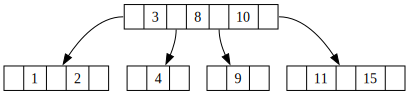

In [103]:
A = Arbre234()
A = A.ajout(8)
A = A.ajout(3)
A = A.ajout(2)
A = A.ajout(4)
A = A.ajout(1)
A = A.ajout(15)
A = A.ajout(10)
A = A.ajout(9)


A = A.ajout(11)
# A = A.ajout(7)
# A = A.ajout(6)
# A = A.ajout(13)
# A = A.ajout(12)
# A = A.ajout(5)
# A = A.ajout(14)
# A = A.ajout(16)
# A = A.ajout(17)

A.afficher_arbre()
print(" ======================== ")
A.visualiser_arbre()



